## Experimenting with a Sankey-like plot for VDJ usage

### Set up tols and some toy data

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
nan = np.nan
df = {
    'AAACCTGAGATAGCAT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAGGGSGTYKYIF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CSADTRGKNIQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 13.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 7.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 3.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 2.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 12.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV29DV5',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV20-1',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ40',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-4',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCAGGGGGGGGCTCAGGAACCTACAAATACATCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGCAGTGCTGATACTAGAGGCAAAAACATTCAGTACTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAACCTGAGTACGCCC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAMRVGGSQGNLIF',
    'TRA_2_cdr3': 'CATDAKDSNYQLIW',
    'TRB_1_cdr3': 'CASSLGPSTDTQYF',
    'TRB_2_cdr3': 'CASSVGQGANNEQFF',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': 14.0,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': 15.0,
    'TRA_1_junction_ins': 4.0,
    'TRA_2_junction_ins': 4.0,
    'TRB_1_junction_ins': 2.0,
    'TRB_2_junction_ins': 4.0,
    'TRA_1_expr': 9.0,
    'TRA_2_expr': 4.0,
    'TRB_1_expr': 55.0,
    'TRB_2_expr': 14.0,
    'TRA_1_v_gene': 'TRAV14DV4',
    'TRA_2_v_gene': 'TRAV17',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'TRBV9',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'TRAJ42',
    'TRA_2_j_gene': 'TRAJ33',
    'TRB_1_j_gene': 'TRBJ2-3',
    'TRB_2_j_gene': 'TRBJ2-1',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCAATGAGGGTCGGAGGAAGCCAAGGAAATCTCATCTTT',
    'TRA_2_cdr3_nt': 'TGTGCTACGGACGCCAAGGATAGCAACTATCAGTTAATCTGG',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCTTGGGACCTAGCACAGATACGCAGTATTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCGTAGGGCAGGGGGCGAACAATGAGCAGTTCTTC'},
    'AAACCTGCATAGAAAC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAFMKPFTAGNQFYF',
    'TRA_2_cdr3': 'CALPFTNTGNQFYF',
    'TRB_1_cdr3': 'CAISEGLSGYTF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 15.0,
    'TRA_2_cdr3_len': 14.0,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 9.0,
    'TRA_2_junction_ins': 8.0,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 9.0,
    'TRA_2_expr': 7.0,
    'TRB_1_expr': 59.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV38-1',
    'TRA_2_v_gene': 'TRAV9-2',
    'TRB_1_v_gene': 'TRBV10-3',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ49',
    'TRA_2_j_gene': 'TRAJ49',
    'TRB_1_j_gene': 'TRBJ1-2',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTTTCATGAAGCCTTTTACCGCCGGTAACCAGTTCTATTTT',
    'TRA_2_cdr3_nt': 'TGTGCTCTGCCCTTTACGAACACCGGTAACCAGTTCTATTTT',
    'TRB_1_cdr3_nt': 'TGTGCCATTAGCGAAGGCCTGAGTGGCTACACCTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAACCTGGTCCGTTAA-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CALNTGGFKTIF',
    'TRA_2_cdr3': 'CAVILDARLMF',
    'TRB_1_cdr3': 'CAWKRGAQSPLHF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 12.0,
    'TRA_2_cdr3_len': 11.0,
    'TRB_1_cdr3_len': 13.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 1.0,
    'TRA_2_junction_ins': 6.0,
    'TRB_1_junction_ins': 8.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 5.0,
    'TRA_2_expr': 5.0,
    'TRB_1_expr': 36.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV19',
    'TRA_2_v_gene': 'TRAV8-1',
    'TRB_1_v_gene': 'TRBV30',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ9',
    'TRA_2_j_gene': 'TRAJ31',
    'TRB_1_j_gene': 'TRBJ1-6',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCTCAATACTGGAGGCTTCAAAACTATCTTT',
    'TRA_2_cdr3_nt': 'TGTGCCGTGATTTTGGATGCCAGACTCATGTTT',
    'TRB_1_cdr3_nt': 'TGTGCCTGGAAGAGGGGGGCTCAGTCACCCCTCCACTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAACCTGGTTTGTGTG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CALRGGRDDKIIF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSQDPGQSSYNEQFF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 17.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 7.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 6.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 3.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 12.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV19',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV4-3',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ30',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCTGAGAGGGGGTAGAGATGACAAGATCATCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGCGCCAGCAGCCAAGATCCTGGACAGAGCTCCTACAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAACCTGTCTCAAGTG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAMTGGYGNKLVF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSRAGSSSGANVLTF',
    'TRB_2_cdr3': 'CASSPLGQGGETQYF',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 17.0,
    'TRB_2_cdr3_len': 15.0,
    'TRA_1_junction_ins': 1.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 3.0,
    'TRB_2_junction_ins': 10.0,
    'TRA_1_expr': 1.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 4.0,
    'TRB_2_expr': 2.0,
    'TRA_1_v_gene': 'TRAV12-3',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV25-1',
    'TRB_2_v_gene': 'TRBV6-5',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'TRAJ47',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-6',
    'TRB_2_j_gene': 'TRBJ2-5',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCAATGACCGGGGGATATGGAAACAAGCTGGTCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTCGGGCAGGGAGCAGCTCTGGGGCCAACGTCCTGACTTTC',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGTCCCCTTGGACAGGGAGGGGAGACCCAGTACTTC'},
    'AAACCTGTCTTCTGGC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAVSHQTGANNLFF',
    'TRA_2_cdr3': 'CALSEGAYGGSQGNLIF',
    'TRB_1_cdr3': 'CASSLTGENQPQHF',
    'TRB_2_cdr3': 'CASSRKFSYEQYF',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': 17.0,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': 13.0,
    'TRA_1_junction_ins': 3.0,
    'TRA_2_junction_ins': 6.0,
    'TRB_1_junction_ins': 5.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 5.0,
    'TRA_2_expr': 4.0,
    'TRB_1_expr': 8.0,
    'TRB_2_expr': 6.0,
    'TRA_1_v_gene': 'TRAV8-4',
    'TRA_2_v_gene': 'TRAV19',
    'TRB_1_v_gene': 'TRBV5-1',
    'TRB_2_v_gene': 'TRBV3-1',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ36',
    'TRA_2_j_gene': 'TRAJ42',
    'TRB_1_j_gene': 'TRBJ1-5',
    'TRB_2_j_gene': 'TRBJ2-7',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCTGTGAGTCACCAAACTGGGGCAAACAACCTCTTCTTT',
    'TRA_2_cdr3_nt': 'TGTGCTCTGAGTGAAGGAGCTTATGGAGGAAGCCAAGGAAATCTCATCTTT',
    'TRB_1_cdr3_nt': 'TGCGCCAGCAGCCTTACAGGGGAAAATCAGCCCCAGCATTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCCGGAAGTTCTCCTACGAGCAGTACTTC'},
    'AAACGGGAGATCACGG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAESLPGYGQNFVF',
    'TRA_2_cdr3': 'CAMREGLNSGGSNYKLTF',
    'TRB_1_cdr3': 'CASSQIQQEKLFF',
    'TRB_2_cdr3': 'CASSFLGRDPYNEQFF',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': 18.0,
    'TRB_1_cdr3_len': 13.0,
    'TRB_2_cdr3_len': 16.0,
    'TRA_1_junction_ins': 11.0,
    'TRA_2_junction_ins': 4.0,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': 8.0,
    'TRA_1_expr': 6.0,
    'TRA_2_expr': 2.0,
    'TRB_1_expr': 7.0,
    'TRB_2_expr': 4.0,
    'TRA_1_v_gene': 'TRAV13-2',
    'TRA_2_v_gene': 'TRAV14DV4',
    'TRB_1_v_gene': 'TRBV2',
    'TRB_2_v_gene': 'TRBV5-8',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'TRBD2',
    'TRA_1_j_gene': 'TRAJ26',
    'TRA_2_j_gene': 'TRAJ53',
    'TRB_1_j_gene': 'TRBJ1-4',
    'TRB_2_j_gene': 'TRBJ2-1',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'TRBC1',
    'TRA_1_cdr3_nt': 'TGTGCAGAGTCTCTACCCGGCTATGGTCAGAATTTTGTCTTT',
    'TRA_2_cdr3_nt': 'TGTGCAATGAGAGAGGGCCTTAATAGTGGAGGTAGCAACTATAAACTGACATTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCAGATACAACAGGAAAAACTGTTTTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCTTTTTGGGGCGGGACCCCTACAATGAGCAGTTCTTC'},
    'AAACGGGAGATGGCGT-1': {'has_tcr': True,
    'multi_chain': True,
    'TRA_1_cdr3': 'CAVWNFNKFYF',
    'TRA_2_cdr3': 'CALKQGGSEKLVF',
    'TRB_1_cdr3': 'CATSDSLGTSGGLGANEQFF',
    'TRB_2_cdr3': 'CASSVNTGELFF',
    'TRA_1_cdr3_len': 11.0,
    'TRA_2_cdr3_len': 13.0,
    'TRB_1_cdr3_len': 20.0,
    'TRB_2_cdr3_len': 12.0,
    'TRA_1_junction_ins': 3.0,
    'TRA_2_junction_ins': 2.0,
    'TRB_1_junction_ins': 13.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 3.0,
    'TRA_2_expr': 2.0,
    'TRB_1_expr': 5.0,
    'TRB_2_expr': 4.0,
    'TRA_1_v_gene': 'TRAV12-2',
    'TRA_2_v_gene': 'TRAV19',
    'TRB_1_v_gene': 'TRBV24-1',
    'TRB_2_v_gene': 'TRBV9',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ21',
    'TRA_2_j_gene': 'TRAJ57',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'TRBJ2-2',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCCGTGTGGAACTTCAACAAATTTTACTTT',
    'TRA_2_cdr3_nt': 'TGTGCTCTGAAACAGGGCGGATCTGAAAAGCTGGTCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCACCAGTGATTCCCTCGGGACTAGCGGGGGGCTCGGGGCCAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCGTAAACACCGGGGAGCTGTTTTTT'},
    'AAACGGGAGGGTCTCC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CALGDSGNTPLVF',
    'TRA_2_cdr3': 'CIVRFGGNTPLVF',
    'TRB_1_cdr3': 'CSARGNRGNTDTQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': 13.0,
    'TRB_1_cdr3_len': 15.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 3.0,
    'TRA_2_junction_ins': 7.0,
    'TRB_1_junction_ins': 6.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 2.0,
    'TRA_2_expr': 2.0,
    'TRB_1_expr': 40.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV6',
    'TRA_2_v_gene': 'TRAV26-1',
    'TRB_1_v_gene': 'TRBV20-1',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ29',
    'TRA_2_j_gene': 'TRAJ29',
    'TRB_1_j_gene': 'TRBJ2-3',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCTAGGAGATTCAGGAAACACACCTCTTGTCTTT',
    'TRA_2_cdr3_nt': 'TGCATCGTCAGGTTCGGGGGAAACACACCTCTTGTCTTT',
    'TRB_1_cdr3_nt': 'TGCAGTGCTAGAGGAAACAGGGGAAACACAGATACGCAGTATTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAACGGGCAACACCTA-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAYAGNNRKLIW',
    'TRA_2_cdr3': 'CAERGYGQNFVF',
    'TRB_1_cdr3': 'CAWSQGLSYNEQFF',
    'TRB_2_cdr3': 'CASSLRTGGRDNEQFF',
    'TRA_1_cdr3_len': 12.0,
    'TRA_2_cdr3_len': 12.0,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': 16.0,
    'TRA_1_junction_ins': 0.0,
    'TRA_2_junction_ins': 4.0,
    'TRB_1_junction_ins': 2.0,
    'TRB_2_junction_ins': 6.0,
    'TRA_1_expr': 9.0,
    'TRA_2_expr': 3.0,
    'TRB_1_expr': 16.0,
    'TRB_2_expr': 13.0,
    'TRA_1_v_gene': 'TRAV38-1',
    'TRA_2_v_gene': 'TRAV13-2',
    'TRB_1_v_gene': 'TRBV30',
    'TRB_2_v_gene': 'TRBV7-9',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'TRAJ38',
    'TRA_2_j_gene': 'TRAJ26',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'TRBJ2-1',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCTTATGCTGGCAACAACCGTAAGCTGATTTGG',
    'TRA_2_cdr3_nt': 'TGTGCAGAGAGAGGCTATGGTCAGAATTTTGTCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCTGGAGTCAGGGGCTCTCCTACAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCCTACGGACAGGGGGAAGGGACAATGAGCAGTTCTTC'},
    'AAACGGGCAGTCTTCC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CALTRTGFQKLVF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSQWNQPQHF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 4.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 8.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 9.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV19',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV3-1',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ8',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCTGACCCGCACAGGCTTTCAGAAACTTGTATTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCAGTGGAACCAGCCCCAGCATTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAACGGGTCAGCTTAG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CVVRVYSSASKIIF',
    'TRA_2_cdr3': 'CAGFNNDMRF',
    'TRB_1_cdr3': 'CASNRQYSNQPQHF',
    'TRB_2_cdr3': 'CSAMGGGSSYNSPLHF',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': 10.0,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': 16.0,
    'TRA_1_junction_ins': 4.0,
    'TRA_2_junction_ins': 2.0,
    'TRB_1_junction_ins': 5.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 7.0,
    'TRA_2_expr': 6.0,
    'TRB_1_expr': 10.0,
    'TRB_2_expr': 7.0,
    'TRA_1_v_gene': 'TRAV8-2',
    'TRA_2_v_gene': 'TRAV25',
    'TRB_1_v_gene': 'TRBV6-1',
    'TRB_2_v_gene': 'TRBV20-1',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ3',
    'TRA_2_j_gene': 'TRAJ43',
    'TRB_1_j_gene': 'TRBJ1-5',
    'TRB_2_j_gene': 'TRBJ1-6',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'TRBC1',
    'TRA_1_cdr3_nt': 'TGTGTTGTGAGGGTCTACAGCAGTGCTTCCAAGATAATCTTT',
    'TRA_2_cdr3_nt': 'TGTGCAGGGTTTAACAATGACATGCGCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAACCGACAGTATAGCAATCAGCCCCAGCATTTT',
    'TRB_2_cdr3_nt': 'TGCAGTGCTATGGGCGGTGGTAGCTCCTATAATTCACCCCTCCACTTT'},
    'AAACGGGTCCAGAAGG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAFLQNTGNQFYF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASRDIGNTIYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 5.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 6.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 11.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV38-1',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV2',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ49',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-3',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTTTCCTCCAGAACACCGGTAACCAGTTCTATTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGGGACATTGGAAACACCATATATTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAACGGGTCCTTGGTC-1': {'has_tcr': True,
    'multi_chain': True,
    'TRA_1_cdr3': 'CAVQAGSGGGADGLTF',
    'TRA_2_cdr3': 'CALSLNTGGFKTIF',
    'TRB_1_cdr3': 'CASSRQGDTQYF',
    'TRB_2_cdr3': 'CASSRLLGGAKNIQYF',
    'TRA_1_cdr3_len': 16.0,
    'TRA_2_cdr3_len': 14.0,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': 16.0,
    'TRA_1_junction_ins': 5.0,
    'TRA_2_junction_ins': 2.0,
    'TRB_1_junction_ins': 1.0,
    'TRB_2_junction_ins': 9.0,
    'TRA_1_expr': 8.0,
    'TRA_2_expr': 7.0,
    'TRB_1_expr': 33.0,
    'TRB_2_expr': 14.0,
    'TRA_1_v_gene': 'TRAV20',
    'TRA_2_v_gene': 'TRAV9-2',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'TRBV28',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'TRAJ45',
    'TRA_2_j_gene': 'TRAJ9',
    'TRB_1_j_gene': 'TRBJ2-3',
    'TRB_2_j_gene': 'TRBJ2-4',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCTGTGCAGGCCGGCTCAGGAGGAGGTGCTGACGGACTCACCTTT',
    'TRA_2_cdr3_nt': 'TGTGCTCTGAGTTTAAATACTGGAGGCTTCAAAACTATCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCGACAGGGGGATACGCAGTATTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGTAGACTTCTAGGGGGGGCCAAAAACATTCAGTACTTC'},
    'AAAGATGAGGTTCCTA-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CASYSGGGADGLTF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLDAGRTETQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 15.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 3.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 7.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 16.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 34.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV41',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ45',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCCTCGTATTCAGGAGGAGGTGCTGACGGACTCACCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCTTAGATGCGGGACGTACAGAGACCCAGTACTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGATGCAGATTGCT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CALSASTGGGNKLTF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSAGRGNEQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 15.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 13.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 5.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 3.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 7.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 21.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV9-2',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV6-3',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ10',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-7',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCTGAGTGCTTCTACGGGAGGAGGAAACAAACTCACCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTGCGGGCAGGGGAAACGAGCAGTACTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGATGCATTAGCCA-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAESRLGNTPLVF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASVSPYNEQFF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 5.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 2.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 1.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 7.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV5',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV6-3',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ29',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCAGAGAGTAGGTTGGGAAACACACCTCTTGTCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCGTCTCGCCCTACAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGATGTCGTCTGCT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAVNSNYQLIW',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLQRVGTEAFF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 11.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 0.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 9.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 7.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 15.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV12-2',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV28',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ33',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-1',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCCGTGAATAGCAACTATCAGTTAATCTGG',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTCTCCAGAGGGTCGGCACTGAAGCTTTCTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGATGTCTTAACCT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAPRGSTLGRLYF',
    'TRA_2_cdr3': 'CAVGGGNKLVF',
    'TRB_1_cdr3': 'CASSIQETQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': 11.0,
    'TRB_1_cdr3_len': 11.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 1.0,
    'TRA_2_junction_ins': 1.0,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 8.0,
    'TRA_2_expr': 5.0,
    'TRB_1_expr': 15.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV19',
    'TRA_2_v_gene': 'TRAV8-3',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ18',
    'TRA_2_j_gene': 'TRAJ47',
    'TRB_1_j_gene': 'TRBJ2-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTCCCAGGGGCTCAACCCTGGGGAGGCTATACTTT',
    'TRA_2_cdr3_nt': 'TGTGCTGTGGGTGGTGGAAACAAACTGGTCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCATTCAAGAGACCCAGTACTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGCAAAGTACGTAA-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAYRIYAGNMLTF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLGTRLQETQYF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 13.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 15.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 3.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 6.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 10.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 22.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV38-2DV8',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV18',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ39',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCTTATAGGATTTATGCAGGCAACATGCTCACCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCTCTCTAGGGACAAGGCTCCAAGAGACCCAGTACTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGCAACAATCTACG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CIVRPQGNAGNMLTF',
    'TRA_2_cdr3': 'CAVYSGGGADGLTF',
    'TRB_1_cdr3': 'CASSLGVDTQYF',
    'TRB_2_cdr3': 'CASTKASIGNEQFF',
    'TRA_1_cdr3_len': 15.0,
    'TRA_2_cdr3_len': 14.0,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': 14.0,
    'TRA_1_junction_ins': 9.0,
    'TRA_2_junction_ins': 1.0,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 3.0,
    'TRA_2_expr': 3.0,
    'TRB_1_expr': 19.0,
    'TRB_2_expr': 11.0,
    'TRA_1_v_gene': 'TRAV26-1',
    'TRA_2_v_gene': 'TRAV41',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'TRBV12-4',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ39',
    'TRA_2_j_gene': 'TRAJ45',
    'TRB_1_j_gene': 'TRBJ2-3',
    'TRB_2_j_gene': 'TRBJ2-1',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGCATCGTCAGACCCCAGGGGAATGCAGGCAACATGCTCACCTTT',
    'TRA_2_cdr3_nt': 'TGTGCTGTTTATTCAGGAGGAGGTGCTGACGGACTCACCTTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCTTAGGTGTAGATACGCAGTATTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCACCAAGGCGTCCATAGGGAATGAGCAGTTCTTC'},
    'AAAGCAAGTAGAGCTG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'None',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLQRSDIQYF',
    'TRB_2_cdr3': 'CASSEGWDSGNTIYF',
    'TRA_1_cdr3_len': nan,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 13.0,
    'TRB_2_cdr3_len': 15.0,
    'TRA_1_junction_ins': nan,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 5.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': nan,
    'TRA_2_expr': nan,
    'TRB_1_expr': 11.0,
    'TRB_2_expr': 8.0,
    'TRA_1_v_gene': 'None',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV12-3',
    'TRB_2_v_gene': 'TRBV6-1',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'None',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-4',
    'TRB_2_j_gene': 'TRBJ1-3',
    'TRA_1_c_gene': 'None',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC1',
    'TRA_1_cdr3_nt': 'None',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTTTACAGCGGTCAGACATTCAGTACTTC',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGTGAAGGGTGGGACTCTGGAAACACCATATATTTT'},
    'AAAGCAAGTCGCTTTC-1': {'has_tcr': True,
    'multi_chain': True,
    'TRA_1_cdr3': 'None',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CSAPTDRVPSGRRNEQFF',
    'TRB_2_cdr3': 'CASSLLPGQNNEQFF',
    'TRA_1_cdr3_len': nan,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 18.0,
    'TRB_2_cdr3_len': 15.0,
    'TRA_1_junction_ins': nan,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 20.0,
    'TRB_2_junction_ins': 6.0,
    'TRA_1_expr': nan,
    'TRA_2_expr': nan,
    'TRB_1_expr': 23.0,
    'TRB_2_expr': 15.0,
    'TRA_1_v_gene': 'None',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV20-1',
    'TRB_2_v_gene': 'TRBV7-2',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'None',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'TRBJ2-1',
    'TRA_1_c_gene': 'None',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'None',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGCAGTGCTCCTACGGACAGGGTTCCTAGCGGGAGAAGGAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCTTACTACCGGGACAGAACAATGAGCAGTTCTTC'},
    'AAAGCAATCGTTTGCC-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAATPSNTGNQFYF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLAGGGQPQHF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 7.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 3.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 4.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 24.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV23DV6',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ49',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCAGCAACACCTTCGAACACCGGTAACCAGTTCTATTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCTTAGCGGGGGGAGGTCAGCCCCAGCATTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGTAGAGGTACTCT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAMRRYSGNTPLVF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLYGGARGNEQFF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 14.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 16.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 5.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 11.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 3.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 35.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV12-3',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV5-5',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ29',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCAATGAGACGTTATTCAGGAAACACACCTCTTGTCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCTGTACGGGGGCGCGCGGGGCAATGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGTAGTCACGAAGG-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CAMGSARQLTF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSLQPQPQHF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 11.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 12.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 0.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': nan,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 2.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 4.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV14DV4',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV28',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'None',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ22',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-5',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGTGCAATGGGTTCTGCAAGGCAACTGACCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTTTACAGCCTCAGCCCCAGCATTTT',
    'TRB_2_cdr3_nt': 'None'},
    'AAAGTAGTCGGAAACG-1': {'has_tcr': True,
    'multi_chain': True,
    'TRA_1_cdr3': 'CAESPTNQAGTALIF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSPRRAGQGFSPLHF',
    'TRB_2_cdr3': 'CASSKSGQGSFSYEQYF',
    'TRA_1_cdr3_len': 15.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 17.0,
    'TRB_2_cdr3_len': 17.0,
    'TRA_1_junction_ins': 6.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 14.0,
    'TRB_2_junction_ins': 7.0,
    'TRA_1_expr': 8.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 12.0,
    'TRB_2_expr': 5.0,
    'TRA_1_v_gene': 'TRAV13-2',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV7-2',
    'TRB_2_v_gene': 'TRBV21-1',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD1',
    'TRB_2_d_gene': 'TRBD1',
    'TRA_1_j_gene': 'TRAJ15',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ1-6',
    'TRB_2_j_gene': 'TRBJ2-7',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC1',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCAGAGAGCCCTACCAACCAGGCAGGAACTGCTCTGATCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCCGCGAAGGGCGGGACAGGGATTTTCACCCCTCCACTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCAAATCGGGACAGGGGTCCTTCTCCTACGAGCAGTACTTC'},
    'AAATGCCAGAAACCAT-1': {'has_tcr': True,
    'multi_chain': False,
    'TRA_1_cdr3': 'CIVRVGSGGGADGLTF',
    'TRA_2_cdr3': 'None',
    'TRB_1_cdr3': 'CASSYLGPSGEQFF',
    'TRB_2_cdr3': 'None',
    'TRA_1_cdr3_len': 16.0,
    'TRA_2_cdr3_len': nan,
    'TRB_1_cdr3_len': 14.0,
    'TRB_2_cdr3_len': nan,
    'TRA_1_junction_ins': 1.0,
    'TRA_2_junction_ins': nan,
    'TRB_1_junction_ins': 2.0,
    'TRB_2_junction_ins': nan,
    'TRA_1_expr': 2.0,
    'TRA_2_expr': nan,
    'TRB_1_expr': 11.0,
    'TRB_2_expr': nan,
    'TRA_1_v_gene': 'TRAV26-1',
    'TRA_2_v_gene': 'None',
    'TRB_1_v_gene': 'TRBV6-6',
    'TRB_2_v_gene': 'None',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'None',
    'TRA_1_j_gene': 'TRAJ45',
    'TRA_2_j_gene': 'None',
    'TRB_1_j_gene': 'TRBJ2-1',
    'TRB_2_j_gene': 'None',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'None',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'None',
    'TRA_1_cdr3_nt': 'TGCATCGTCAGAGTCGGTTCAGGAGGAGGTGCTGACGGACTCACCTTT',
    'TRA_2_cdr3_nt': 'None',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGTTACCTGGGACCCAGCGGTGAGCAGTTCTTC',
    'TRB_2_cdr3_nt': 'None'},
    'AAATGCCAGATCTGAA-1': {'has_tcr': True,
    'multi_chain': True,
    'TRA_1_cdr3': 'CAEQTGANNLFF',
    'TRA_2_cdr3': 'CAMREGTFRKTSYDKVIF',
    'TRB_1_cdr3': 'CASSQPGAGPGELFF',
    'TRB_2_cdr3': 'CASSLGLAVSTDTQYF',
    'TRA_1_cdr3_len': 12.0,
    'TRA_2_cdr3_len': 18.0,
    'TRB_1_cdr3_len': 15.0,
    'TRB_2_cdr3_len': 16.0,
    'TRA_1_junction_ins': 2.0,
    'TRA_2_junction_ins': 9.0,
    'TRB_1_junction_ins': 7.0,
    'TRB_2_junction_ins': 4.0,
    'TRA_1_expr': 8.0,
    'TRA_2_expr': 5.0,
    'TRB_1_expr': 11.0,
    'TRB_2_expr': 10.0,
    'TRA_1_v_gene': 'TRAV21',
    'TRA_2_v_gene': 'TRAV14DV4',
    'TRB_1_v_gene': 'TRBV3-1',
    'TRB_2_v_gene': 'TRBV7-9',
    'TRA_1_d_gene': 'None',
    'TRA_2_d_gene': 'None',
    'TRB_1_d_gene': 'TRBD2',
    'TRB_2_d_gene': 'TRBD2',
    'TRA_1_j_gene': 'TRAJ36',
    'TRA_2_j_gene': 'TRAJ50',
    'TRB_1_j_gene': 'TRBJ2-2',
    'TRB_2_j_gene': 'TRBJ2-3',
    'TRA_1_c_gene': 'TRAC',
    'TRA_2_c_gene': 'TRAC',
    'TRB_1_c_gene': 'TRBC2',
    'TRB_2_c_gene': 'TRBC2',
    'TRA_1_cdr3_nt': 'TGTGCTGAGCAAACTGGGGCAAACAACCTCTTCTTT',
    'TRA_2_cdr3_nt': 'TGTGCAATGAGAGAGGGCACTTTCAGGAAAACCTCCTACGACAAGGTGATATTT',
    'TRB_1_cdr3_nt': 'TGTGCCAGCAGCCAACCAGGAGCGGGCCCCGGGGAGCTGTTTTTT',
    'TRB_2_cdr3_nt': 'TGTGCCAGCAGCTTAGGGCTAGCGGTTAGCACAGATACGCAGTATTTT'}
}
df = pd.DataFrame.from_dict(df, orient="index")
df.head()

,has_tcr,multi_chain,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3,TRA_1_cdr3_len,TRA_2_cdr3_len,TRB_1_cdr3_len,TRB_2_cdr3_len,...,TRB_1_j_gene,TRB_2_j_gene,TRA_1_c_gene,TRA_2_c_gene,TRB_1_c_gene,TRB_2_c_gene,TRA_1_cdr3_nt,TRA_2_cdr3_nt,TRB_1_cdr3_nt,TRB_2_cdr3_nt
AAACCTGAGATAGCAT-1,True,False,CAGGGSGTYKYIF,None,CSADTRGKNIQYF,None,13.0,NaN,13.0,NaN,...,TRBJ2-4,None,TRAC,None,TRBC2,None,TGTGCAGGGGGGGGCTCAGGAACCTACAAATACATCTTT,None,TGCAGTGCTGATACTAGAGGCAAAAACATTCAGTACTTC,None
AAACCTGAGTACGCCC-1,True,False,CAMRVGGSQGNLIF,CATDAKDSNYQLIW,CASSLGPSTDTQYF,CASSVGQGANNEQFF,14.0,14.0,14.0,15.0,...,TRBJ2-3,TRBJ2-1,TRAC,TRAC,TRBC2,TRBC2,TGTGCAATGAGGGTCGGAGGAAGCCAAGGAAATCTCATCTTT,TGTGCTACGGACGCCAAGGATAGCAACTATCAGTTAATCTGG,TGTGCCAGCAGCTTGGGACCTAGCACAGATACGCAGTATTTT,TGTGCCAGCAGCGTAGGGCAGGGGGCGAACAATGAGCAGTTCTTC
AAACCTGCATAGAAAC-1,True,False,CAFMKPFTAGNQFYF,CALPFTNTGNQFYF,CAISEGLSGYTF,None,15.0,14.0,12.0,NaN,...,TRBJ1-2,None,TRAC,TRAC,TRBC1,None,TGTGCTTTCATGAAGCCTTTTACCGCCGGTAACCAGTTCTATTTT,TGTGCTCTGCCCTTTACGAACACCGGTAACCAGTTCTATTTT,TGTGCCATTAGCGAAGGCCTGAGTGGCTACACCTTC,None
AAACCTGGTCCGTTAA-1,True,False,CALNTGGFKTIF,CAVILDARLMF,CAWKRGAQSPLHF,None,12.0,11.0,13.0,NaN,...,TRBJ1-6,None,TRAC,TRAC,TRBC1,None,TGTGCTCTCAATACTGGAGGCTTCAAAACTATCTTT,TGTGCCGTGATTTTGGATGCCAGACTCATGTTT,TGTGCCTGGAAGAGGGGGGCTCAGTCACCCCTCCACTTT,None
AAACCTGGTTTGTGTG-1,True,False,CALRGGRDDKIIF,None,CASSQDPGQSSYNEQFF,None,13.0,NaN,17.0,NaN,...,TRBJ2-1,None,TRAC,None,TRBC2,None,TGTGCTCTGAGAGGGGGTAGAGATGACAAGATCATCTTT,None,TGCGCCAGCAGCCAAGATCCTGGACAGAGCTCCTACAATGAGCAGT...,None


Add a sample tag

In [3]:
def f(x):
    return 'sample_'+str(np.random.randint(6))
df['sample'] = df.apply(f, axis=1)
df.head()

,has_tcr,multi_chain,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3,TRA_1_cdr3_len,TRA_2_cdr3_len,TRB_1_cdr3_len,TRB_2_cdr3_len,...,TRB_2_j_gene,TRA_1_c_gene,TRA_2_c_gene,TRB_1_c_gene,TRB_2_c_gene,TRA_1_cdr3_nt,TRA_2_cdr3_nt,TRB_1_cdr3_nt,TRB_2_cdr3_nt,sample
AAACCTGAGATAGCAT-1,True,False,CAGGGSGTYKYIF,None,CSADTRGKNIQYF,None,13.0,NaN,13.0,NaN,...,None,TRAC,None,TRBC2,None,TGTGCAGGGGGGGGCTCAGGAACCTACAAATACATCTTT,None,TGCAGTGCTGATACTAGAGGCAAAAACATTCAGTACTTC,None,sample_2
AAACCTGAGTACGCCC-1,True,False,CAMRVGGSQGNLIF,CATDAKDSNYQLIW,CASSLGPSTDTQYF,CASSVGQGANNEQFF,14.0,14.0,14.0,15.0,...,TRBJ2-1,TRAC,TRAC,TRBC2,TRBC2,TGTGCAATGAGGGTCGGAGGAAGCCAAGGAAATCTCATCTTT,TGTGCTACGGACGCCAAGGATAGCAACTATCAGTTAATCTGG,TGTGCCAGCAGCTTGGGACCTAGCACAGATACGCAGTATTTT,TGTGCCAGCAGCGTAGGGCAGGGGGCGAACAATGAGCAGTTCTTC,sample_0
AAACCTGCATAGAAAC-1,True,False,CAFMKPFTAGNQFYF,CALPFTNTGNQFYF,CAISEGLSGYTF,None,15.0,14.0,12.0,NaN,...,None,TRAC,TRAC,TRBC1,None,TGTGCTTTCATGAAGCCTTTTACCGCCGGTAACCAGTTCTATTTT,TGTGCTCTGCCCTTTACGAACACCGGTAACCAGTTCTATTTT,TGTGCCATTAGCGAAGGCCTGAGTGGCTACACCTTC,None,sample_2
AAACCTGGTCCGTTAA-1,True,False,CALNTGGFKTIF,CAVILDARLMF,CAWKRGAQSPLHF,None,12.0,11.0,13.0,NaN,...,None,TRAC,TRAC,TRBC1,None,TGTGCTCTCAATACTGGAGGCTTCAAAACTATCTTT,TGTGCCGTGATTTTGGATGCCAGACTCATGTTT,TGTGCCTGGAAGAGGGGGGCTCAGTCACCCCTCCACTTT,None,sample_2
AAACCTGGTTTGTGTG-1,True,False,CALRGGRDDKIIF,None,CASSQDPGQSSYNEQFF,None,13.0,NaN,17.0,NaN,...,None,TRAC,None,TRBC2,None,TGTGCTCTGAGAGGGGGTAGAGATGACAAGATCATCTTT,None,TGCGCCAGCAGCCAAGATCCTGGACAGAGCTCCTACAATGAGCAGT...,None,sample_5


In order to let user normalize cell numbers to sample size or any of the sorts, I add an 'effective_size'column for now.

In [4]:
fraction_base = 'sample'
group_sizes = df.loc[:, fraction_base].value_counts().to_dict()
df["groupsize"] = (df[fraction_base].map(group_sizes).astype("int32"))
df["effective_size"] = 1/df["groupsize"]
df.head()

,has_tcr,multi_chain,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3,TRA_1_cdr3_len,TRA_2_cdr3_len,TRB_1_cdr3_len,TRB_2_cdr3_len,...,TRA_2_c_gene,TRB_1_c_gene,TRB_2_c_gene,TRA_1_cdr3_nt,TRA_2_cdr3_nt,TRB_1_cdr3_nt,TRB_2_cdr3_nt,sample,groupsize,effective_size
AAACCTGAGATAGCAT-1,True,False,CAGGGSGTYKYIF,None,CSADTRGKNIQYF,None,13.0,NaN,13.0,NaN,...,None,TRBC2,None,TGTGCAGGGGGGGGCTCAGGAACCTACAAATACATCTTT,None,TGCAGTGCTGATACTAGAGGCAAAAACATTCAGTACTTC,None,sample_2,5,0.20
AAACCTGAGTACGCCC-1,True,False,CAMRVGGSQGNLIF,CATDAKDSNYQLIW,CASSLGPSTDTQYF,CASSVGQGANNEQFF,14.0,14.0,14.0,15.0,...,TRAC,TRBC2,TRBC2,TGTGCAATGAGGGTCGGAGGAAGCCAAGGAAATCTCATCTTT,TGTGCTACGGACGCCAAGGATAGCAACTATCAGTTAATCTGG,TGTGCCAGCAGCTTGGGACCTAGCACAGATACGCAGTATTTT,TGTGCCAGCAGCGTAGGGCAGGGGGCGAACAATGAGCAGTTCTTC,sample_0,10,0.10
AAACCTGCATAGAAAC-1,True,False,CAFMKPFTAGNQFYF,CALPFTNTGNQFYF,CAISEGLSGYTF,None,15.0,14.0,12.0,NaN,...,TRAC,TRBC1,None,TGTGCTTTCATGAAGCCTTTTACCGCCGGTAACCAGTTCTATTTT,TGTGCTCTGCCCTTTACGAACACCGGTAACCAGTTCTATTTT,TGTGCCATTAGCGAAGGCCTGAGTGGCTACACCTTC,None,sample_2,5,0.20
AAACCTGGTCCGTTAA-1,True,False,CALNTGGFKTIF,CAVILDARLMF,CAWKRGAQSPLHF,None,12.0,11.0,13.0,NaN,...,TRAC,TRBC1,None,TGTGCTCTCAATACTGGAGGCTTCAAAACTATCTTT,TGTGCCGTGATTTTGGATGCCAGACTCATGTTT,TGTGCCTGGAAGAGGGGGGCTCAGTCACCCCTCCACTTT,None,sample_2,5,0.20
AAACCTGGTTTGTGTG-1,True,False,CALRGGRDDKIIF,None,CASSQDPGQSSYNEQFF,None,13.0,NaN,17.0,NaN,...,None,TRBC2,None,TGTGCTCTGAGAGGGGGTAGAGATGACAAGATCATCTTT,None,TGCGCCAGCAGCCAAGATCCTGGACAGAGCTCCTACAATGAGCAGT...,None,sample_5,4,0.25


### Start doing something

One pillar of the plot constitutes of stacked bar plots showing the abundance of individual V, D and J genes.

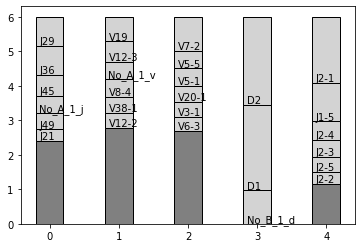

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
gene_loci = [ 'TRA_1_j_gene', 'TRA_1_v_gene', 'TRB_1_v_gene', 'TRB_1_d_gene', 'TRB_1_j_gene']
size_column = 'effective_size'
bar_clip = 5
barwidth = 0.4
gene_tops = dict()
for i in range(len(gene_loci)):
    td = df.groupby(gene_loci[i])[size_column].agg('sum').sort_values(ascending=False)
    genes = td.index.values
    sector  = gene_loci[i][2:7]
    unct = td[bar_clip+1:, ].sum()
    ax.bar(i, unct, width=barwidth, color='grey', edgecolor='black')
    gene_tops['Other'] = unct
    bottom = unct
    for j in range(bar_clip+1):
        try:
            y = td[bar_clip-j]
            gene = genes[bar_clip-j]
            if gene == 'None':
                gene = 'No_'+sector
            gene_tops[gene] = bottom+y
            ax.bar(i, y, width=barwidth, bottom=bottom, color='lightgrey', edgecolor='black')
            ax.text(i-barwidth/2+0.05, bottom+0.05, gene.replace('TRA', '').replace('TRB', ''))
            bottom += y
        except:
            pass

In [23]:
gene_tops

{'Other': 1.1666666666666667,
 'TRAJ21': 2.733333333333334,
 'TRAJ49': 3.2000000000000006,
 'No_A_1_j': 3.7000000000000006,
 'TRAJ45': 4.316666666666667,
 'TRAJ36': 5.15,
 'TRAJ29': 6.0,
 'TRAV12-2': 3.216666666666667,
 'TRAV38-1': 3.6833333333333336,
 'TRAV8-4': 4.183333333333334,
 'No_A_1_v': 4.683333333333334,
 'TRAV12-3': 5.283333333333333,
 'TRAV19': 6.0,
 'TRBV6-3': 3.1,
 'TRBV3-1': 3.533333333333333,
 'TRBV20-1': 4.0,
 'TRBV5-1': 4.5,
 'TRBV5-5': 5.0,
 'TRBV7-2': 6.0,
 'No_B_1_d': 0.9666666666666666,
 'TRBD1': 3.4333333333333336,
 'TRBD2': 6.0,
 'TRBJ2-2': 1.5,
 'TRBJ2-5': 1.9333333333333333,
 'TRBJ2-3': 2.4333333333333336,
 'TRBJ2-4': 2.966666666666667,
 'TRBJ1-5': 4.083333333333334,
 'TRBJ2-1': 6.0}

The other component is the flow of these gene into each other represented by bands or ribbons. Each unique gene combination is a separate ribbon and only the most abundant combinations would be shown.

In [24]:
td = df.groupby(gene_loci)[size_column].agg('sum').sort_values(ascending=False).reset_index()
def f(r, loci):
    l = [r[size_column]]
    for g in loci:
        l.append(r[g])
    return l
td = td
td['genecombination'] = td.apply(f, axis=1, loci = gene_loci)
td['genecombination'].tolist()

[[0.5, 'TRAJ36', 'TRAV8-4', 'TRBV5-1', 'TRBD1', 'TRBJ1-5'],
 [0.5, 'TRAJ29', 'TRAV12-3', 'TRBV5-5', 'TRBD1', 'TRBJ2-1'],
 [0.3333333333333333, 'TRAJ36', 'TRAV21', 'TRBV3-1', 'TRBD2', 'TRBJ2-2'],
 [0.3333333333333333, 'TRAJ21', 'TRAV12-2', 'TRBV24-1', 'TRBD2', 'TRBJ2-1'],
 [0.3333333333333333, 'None', 'None', 'TRBV12-3', 'TRBD2', 'TRBJ2-4'],
 [0.25, 'TRAJ30', 'TRAV19', 'TRBV4-3', 'TRBD1', 'TRBJ2-1'],
 [0.25, 'TRAJ3', 'TRAV8-2', 'TRBV6-1', 'TRBD1', 'TRBJ1-5'],
 [0.25, 'TRAJ45', 'TRAV26-1', 'TRBV6-6', 'TRBD2', 'TRBJ2-1'],
 [0.25, 'TRAJ29', 'TRAV5', 'TRBV6-3', 'TRBD2', 'TRBJ2-1'],
 [0.2, 'TRAJ26', 'TRAV13-2', 'TRBV2', 'None', 'TRBJ1-4'],
 [0.2, 'TRAJ49', 'TRAV38-1', 'TRBV10-3', 'None', 'TRBJ1-2'],
 [0.2, 'TRAJ9', 'TRAV19', 'TRBV30', 'TRBD1', 'TRBJ1-6'],
 [0.2, 'TRAJ40', 'TRAV29DV5', 'TRBV20-1', 'TRBD2', 'TRBJ2-4'],
 [0.2, 'TRAJ45', 'TRAV20', 'TRBV7-2', 'TRBD1', 'TRBJ2-3'],
 [0.16666666666666666, 'TRAJ49', 'TRAV23DV6', 'TRBV7-2', 'TRBD2', 'TRBJ1-5'],
 [0.16666666666666666, 'None', 'None', '

The ribbon positions of top combinations should then be calculated.

In [25]:
top_n = 5
for r in td['genecombination'][1:top_n+1]:
    d = []
    ht = r[0]
    for g in r[1:]:
        if g in gene_tops:
            t = gene_tops[g]
        else:
            t = gene_tops['Other']
            g = 'Other'
        d. append([t-ht, t])
        t = t-ht
        gene_tops[g] = t
d

[[-0.7499999999999998, -0.4999999999999997],
 [5.75, 6.0],
 [-0.9999999999999998, -0.7499999999999998],
 [2.6833333333333336, 2.9333333333333336],
 [4.916666666666667, 5.166666666666667]]

Based on these coordinates, bands can be drawn inbetween the bars. The shape of the ribbon can be defined by a sigmoid function, for example.

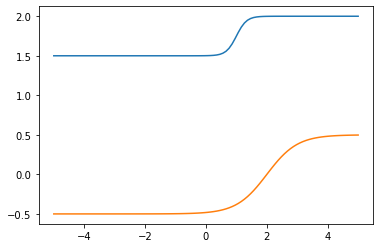

In [26]:
def sigmoid_cs(x, xshift, width, yshift, height, spread=6):
    y = yshift + (height/(1+np.exp(-((spread/width)*(x-xshift)))))
    return y

x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid_cs(x, 1, 1, 1.5, 0.5))
plt.plot(x, sigmoid_cs(x, 2, 3, -0.5, 1))

The ribbon would be the area filled between two sigmoid curves, and theere shold also baps for the bars.

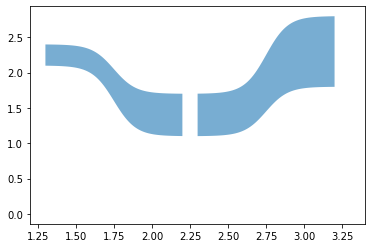

In [27]:
def gapped_ribbons(data, ax, xstart=1.3, gapfreq=1, gapwidth=0.6, fun=lambda x: x[3]+ (x[4]/(1+np.exp(-((x[5]/x[2])*(x[0]-x[1])))))):
    spread = 10
    xw = gapfreq-gapwidth
    slope = xw*0.8
    x, y1, y2 = [], [], []
    for i in range(1, len(data)):
        xmin = xstart+(i-1)*gapfreq
        tx = np.linspace(xmin, xmin+xw, 100)
        xshift = xmin+xw/2
        p1, p2 = data[i-1]
        p3, p4 = data[i]
        yshift1 = p1
        ty1 = fun((tx, xshift, slope, p1, p3-p1, spread))
        ty2 = fun((tx, xshift, slope, p2, p4-p2, spread))
        x += tx.tolist()
        y1 += ty1.tolist()
        y2 += ty2.tolist()
        x += np.linspace(xmin+xw, xstart+i*gapfreq, 10).tolist()
        y1 += np.zeros(10).tolist()
        y2 += np.zeros(10).tolist()
    ax.fill_between(x, y1, y2, alpha=0.6)
    return ax

data = [[2.1, 2.4], [1.1, 1.7], [1.8, 2.8]]
fig = plt.figure()
ax = fig.add_subplot(111)
gapped_ribbons(data, ax, gapwidth=0.1)

No let us draw the ribbons for each combination

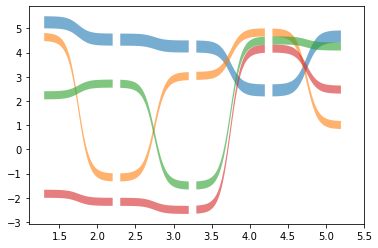

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

for r in td['genecombination'][1:5]:
    d = []
    ht = r[0]
    for g in r[1:]:
        if g in gene_tops:
            t = gene_tops[g]
        else:
            t = gene_tops['Other']
            g = 'Other'
        d. append([t-ht, t])
        t = t-ht
        gene_tops[g] = t
    ax = gapped_ribbons(d, ax, gapwidth=0.1)

Put together what we have

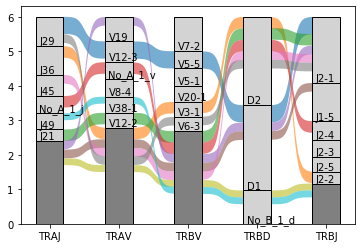

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

def gapped_ribbons(data, ax, xstart=1.2, gapfreq=1, gapwidth=0.4, fun=lambda x: x[3]+ (x[4]/(1+np.exp(-((x[5]/x[2])*(x[0]-x[1])))))):
    spread = 10
    xw = gapfreq-gapwidth
    slope = xw*0.8
    x, y1, y2 = [], [], []
    for i in range(1, len(data)):
        xmin = xstart+(i-1)*gapfreq
        tx = np.linspace(xmin, xmin+xw, 100)
        xshift = xmin+xw/2
        p1, p2 = data[i-1]
        p3, p4 = data[i]
        yshift1 = p1
        ty1 = fun((tx, xshift, slope, p1, p3-p1, spread))
        ty2 = fun((tx, xshift, slope, p2, p4-p2, spread))
        x += tx.tolist()
        y1 += ty1.tolist()
        y2 += ty2.tolist()
        x += np.linspace(xmin+xw, xstart+i*gapfreq, 10).tolist()
        y1 += np.zeros(10).tolist()
        y2 += np.zeros(10).tolist()
    ax.fill_between(x, y1, y2, alpha=0.6)
    return ax

def vdj_usage(
    df,
    ax,
    gene_loci = [ 'TRA_1_j_gene', 'TRA_1_v_gene', 'TRB_1_v_gene', 'TRB_1_d_gene', 'TRB_1_j_gene'],
    size_column = 'effective_size',
    bar_clip = 5,
    top_n = 10,
    barwidth = 0.4,
    draw_bars=True
):
    # Create bars
    gene_tops = dict()
    for i in range(len(gene_loci)):
        td = df.groupby(gene_loci[i])[size_column].agg('sum').sort_values(ascending=False)
        genes = td.index.values
        sector  = gene_loci[i][2:7]
        unct = td[bar_clip+1:, ].sum()
        if td.size > bar_clip:
            if draw_bars:
                ax.bar(i+1, unct, width=barwidth, color='grey', edgecolor='black')
            gene_tops['other_'+sector] = unct
            bottom = unct
        else:
            gene_tops['other_'+sector] = 0
            bottom = 0
        for j in range(bar_clip+1):
            try:
                y = td[bar_clip-j]
                gene = genes[bar_clip-j]
                if gene == 'None':
                    gene = 'No_'+sector
                gene_tops[gene] = bottom+y
                if draw_bars:
                    ax.bar(i+1, y, width=barwidth, bottom=bottom, color='lightgrey', edgecolor='black')
                    ax.text(1+i-barwidth/2+0.05, bottom+0.05, gene.replace('TRA', '').replace('TRB', ''))
                bottom += y
            except:
                pass
            
    # Collect data for ribbons
    def generow_formatter(r, loci):
        l = [r[size_column]]
        for g in loci:
            l.append(r[g])
        return l
    td = df.groupby(gene_loci)[size_column].agg('sum').sort_values(ascending=False).reset_index()
    td['genecombination'] = td.apply(generow_formatter, axis=1, loci = gene_loci)
    
    # Draw ribbons
    for r in td['genecombination'][1:top_n+1]:
        d = []
        ht = r[0]
        for i in range(len(r)-1):
            g = r[i+1]
            sector  = gene_loci[i][2:7]
            if g == 'None':
                g = 'No_'+sector
            if g not in gene_tops:
                g = 'other_'+sector
            t = gene_tops[g]
            d.append([t-ht, t])
            t = t-ht
            gene_tops[g] = t
        if draw_bars:
           gapped_ribbons(d, ax)
        else:
           gapped_ribbons(d, ax, gapwidth=0.1)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels(['TRAJ', 'TRAV', 'TRBV', 'TRBD', 'TRBJ'])
    return ax

ax = vdj_usage(df, ax)

Or we can just show the bands, without bars

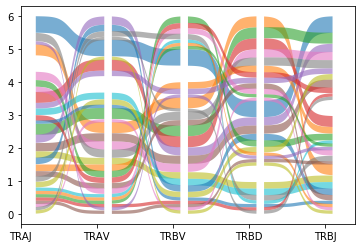

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
vdj_usage(df, ax, top_n=100, draw_bars=False)

In [61]:
td = df.groupby(gene_loci[3])[size_column].agg('sum').sort_values(ascending=False)
td

TRB_1_d_gene
TRBD2    2.566667
TRBD1    2.466667
None     0.966667
Name: effective_size, dtype: float64

In [64]:
td.size

3